In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def objective(x, mu, d=200):
    A = np.zeros((d,d))
    for i in range(1, d-1):
        A[i, i-1] = 1
        A[i, i+1] = 1
    A[0,1] = 1
    A[d-1, d-2] = 1
    
    M = 2*np.eye(d) - A
    b = np.zeros(d)
    b[0] = 1
    
    
    
    output = 0.5*(np.matmul(np.matmul(x, M), np.transpose(x))) - np.matmul(np.transpose(b), x)
    for i in range(d):
        output = output + (mu/2)*(x[i]**2)
    
    return output

In [10]:
def grad(x, mu, d=200):
    A = np.zeros((d,d))
    for i in range(1, d-1):
        A[i, i-1] = 1
        A[i, i+1] = 1
    A[0,1] = 1
    A[d-1, d-2] = 1
    
    M = 2*np.eye(d) - A
    b = np.zeros(d)
    b[0] = 1
    
    gradient = np.add(np.subtract(np.matmul(x, M), b), mu*x)
    return gradient

In [14]:
def nesterov(max_iter, mu, x_init = np.zeros(200), L = 4, d=200):
    
    L = L + mu
    
    a = 1/L
    A = 1/L
    v = np.subtract(x_init, grad(x_init, mu)*a)
    x = x_init
    y = np.subtract(x_init, grad(x_init, mu)/L)
    
    values = [objective(y, mu)]
    
    for i in range(1, max_iter):
        
        a_prev = a
        a = (i+2)/L
        
        A_prev = A
        A = a + A_prev
        
        v_prev = v
        x = y * (A_prev/A) + v_prev * (a/A)
        v = v_prev - grad(x, mu) * a
        
        y = x - grad(x, mu)/L
        values = np.append(values, objective(y, mu))
        
    return values

In [108]:
def nesterov_strong_convex(max_iter, mu, x_init = np.zeros(200), L = 4, d=200):
    L = L + mu
    
    x = x_init
    y = np.subtract(x_init, grad(x_init, mu)/L)
    a = 1/(L - mu)
    A = 1/(L - mu)
    
    v = ( np.subtract( (1 + mu*a) * x , a * grad(x, mu)) ) / (1 + mu*A)
    
    values = [(objective(y, mu))]
    
    for i in range(1, max_iter):
        
        A_prev = A
        v_prev = v
        
        try:
            coeff = np.asarray([mu - L, 1 + 2*mu*A, mu*(A**2) + A])
            roots = np.roots(coeff)

            if(roots[0] > 0):
                a = roots[0]
            elif(roots[1] > 0):
                a = roots[1]
            else:
                continue
        except:
            continue
            
        A = A + a
        
        x = np.add( ( A_prev / (A * (1-(mu/L))) )*y , ( 1 - (A_prev)/(A*(1 -(mu/L))) )*v_prev )
        
        v = (np.add( (1 + mu*A_prev) * v_prev , a*( np.subtract(mu*x, grad(x, mu)) ) )) / (1 + mu*A)
        
        y = np.subtract(x , grad(x, mu)/L)
        
        values = np.append(values, objective(y, mu))
        
    return values

In [104]:
def heavy_ball(max_iter, mu, x_init = np.zeros(200), L = 4, d=200):
    
    L = L + mu
    
    a_1 = 4 / (np.sqrt(mu) + np.sqrt(L))**2
    a_2 = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))
    
    x_curr = x_init
    
    values = [objective(x_init, mu)]
    
    x_curr = x_curr - a_1 * grad(x_curr, mu)
    values = np.append(values, objective(x_curr, mu))
    
    x_prev = x_init
    
    for i in range(2, max_iter):
        x_next = x_curr - a_1 * grad(x_curr, mu) + a_2 * np.subtract(x_curr, x_prev)
        values = np.append(values, objective(x_next, mu))
        
        x_prev = x_curr
        x_curr = x_next

    return values

In [117]:
def minimum(mu, d=200):
    A = np.zeros((d,d))
    for i in range(1, d-1):
        A[i, i-1] = 1
        A[i, i+1] = 1
    A[0,1] = 1
    A[d-1, d-2] = 1
    
    M = 2*np.eye(d) - A
    b = np.zeros(d)
    b[0] = 1
    
    inverse = np.linalg.inv( np.add(M, mu*np.identity(d)) )
    x = np.matmul(inverse, b)
    return objective(x, mu)

C:\Users\edwar\AppData\Local\Temp\ipykernel_26224\2769256160.py:19: RuntimeWarning: overflow encountered in double_scalars
  coeff = np.asarray([mu - L, 1 + 2*mu*A, mu*(A**2) + A])


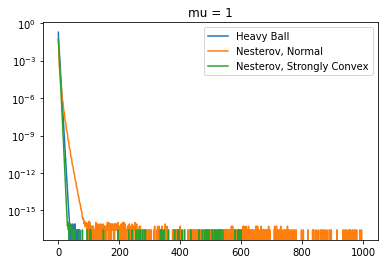

In [124]:
y1_heavyball = heavy_ball(1000, 1) - minimum(1)
y1_conjugate = conjugate_gradient(1000, 1) - minimum(1)
y1_nesterov = nesterov(1000, 1) - minimum(1)
y1_nesterov_strong = nesterov_strong_convex(1000, 1) - minimum(1)

plt.plot(y1_heavyball, label = "Heavy Ball")
#plt.plot(y1_conjugate, label = "Conjugate Gradient")
plt.plot(y1_nesterov, label = "Nesterov, Normal")
plt.plot(y1_nesterov_strong, label = "Nesterov, Strongly Convex")

plt.yscale("log")
plt.title("mu = 1")
plt.legend()

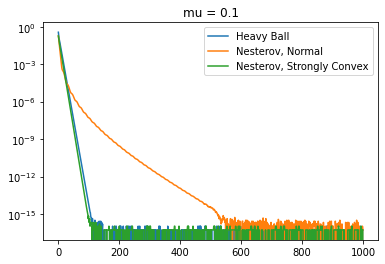

In [125]:
y2_heavyball = heavy_ball(1000, .1) - minimum(.1)
#y2_conjugate = conjugate_gradient(1000, .1) - minimum(.1)
y2_nesterov = nesterov(1000, .1) - minimum(.1)
y2_nesterov_strong = nesterov_strong_convex(1000, .1) - minimum(.1)

plt.plot(y2_heavyball, label = "Heavy Ball")
#plt.plot(y2_conjugate, label = "Conjugate Gradient")
plt.plot(y2_nesterov, label = "Nesterov, Normal")
plt.plot(y2_nesterov_strong, label = "Nesterov, Strongly Convex")

plt.yscale("log")
plt.title("mu = 0.1")
plt.legend()

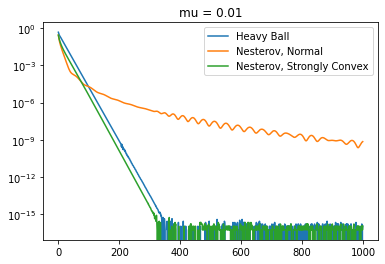

In [126]:
y3_heavyball = heavy_ball(1000, .01) - minimum(.01)
#y3_conjugate = conjugate_gradient(1000, .01) - minimum(.01)
y3_nesterov = nesterov(1000, .01) - minimum(.01)
y3_nesterov_strong = nesterov_strong_convex(1000, .01) - minimum(.01)

plt.plot(y3_heavyball, label = "Heavy Ball")
#plt.plot(y3_conjugate, label = "Conjugate Gradient")
plt.plot(y3_nesterov, label = "Nesterov, Normal")
plt.plot(y3_nesterov_strong, label = "Nesterov, Strongly Convex")

plt.yscale("log")
plt.title("mu = 0.01")
plt.legend()

As expected, Nesterov for Strongly-Convex functions performs much better than "normal" Nesterov. As our strong-convexity parameter decreases, the disparity between the two increases. I don't have a rigorous proof as to why this is the case, but trying to visualize what it means to be $\mu$-strongly convex, we can create lower-bounding quadratics with positive coefficient $\mu$. As $\mu$ gets smaller, our quadratic becomes "wider" - it descends more slowly - so our lower bound when performing the analysis for the strongly-convex should be closer to the actual minimum when compared to that of "normal" Nesterov.

As for the Heavy-Ball method, it performs very similarly to Nesterov for Strong Convexity. Since the two methods both have a sort of momentum-like increase in step, it makes sense that they have similar convergence. I believe the main difference between the two is that Heavy-Ball will likely "over-shoot" the minimum as a result of its "conserved" momentum, whereas Nesterov has a slightly more "controlled" step with another gradient descent step.

In [119]:
def nesterov_mod(max_iter, mu, x_init = np.zeros(200), L = 4, d=200):
    
    L = L + mu
    
    a = 1/L
    A = 1/L
    v = np.subtract(x_init, grad(x_init, mu)*a)
    x = x_init
    y = np.subtract(x_init, grad(x_init, mu)/L)
    
    values = [objective(y, mu)]
    
    for i in range(1, max_iter):
        
        a_prev = a
        a = (i+2)/L
        
        A_prev = A
        A = a + A_prev
        
        v_prev = v
        x = y * (A_prev/A) + v_prev * (a/A)
        v = v_prev - grad(x, mu) * a
        
        alt = y - grad(y,mu)/L
        y = x - grad(x, mu)/L
        
        if(objective(alt, mu) < objective(y, mu)):
            values = np.append(values, objective(alt, mu))
        else:
            values = np.append(values, objective(y, mu))
        
    return values

Choosing $z_k = y_k - \frac{1}{L} \nabla f(y_k)$, we get that $x_{k+1} = \text{argmin} \left\{f(x_k - \frac{1}{L} \nabla f(x_k)), y_k - \frac{1}{L} \nabla f(y_k) \right\}$ which guarentees every step descends at least as much as standard GD. Because of this, even if our next output point uses standard GD as opposed to Nesterov, the analysis still holds true as $f(z_k) \le f(y_k) - \frac{1}{2L} \| \nabla f(y_k) \|_2^2$. Our algorithm performs at least as good as Nesterov and at least as good as standard GD. However, since we are applying smooth-convex Nesterov Acceleration to a strongly-convex problem, our guarentee on this will not be as fast as standard GD, so our theoretical bound is that of standard GD for strongly-convex problems, taking $O\left(\frac{L}{\mu} \log(\frac{L \|x^* - x_0\|^2}{\epsilon}) \right)$ iterations to output a point $f(x_k) - f^* \le \epsilon$

C:\Users\edwar\AppData\Local\Temp\ipykernel_26224\2769256160.py:19: RuntimeWarning: overflow encountered in double_scalars
  coeff = np.asarray([mu - L, 1 + 2*mu*A, mu*(A**2) + A])


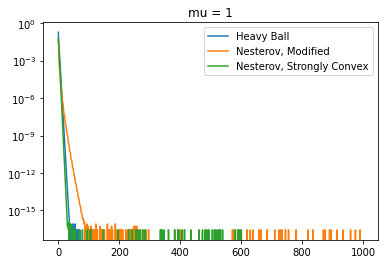

In [127]:
y1_heavyball = heavy_ball(1000, 1) - minimum(1)
#y1_conjugate = conjugate_gradient(1000, 1) - minimum(1)
y1_nesterov = nesterov_mod(1000, 1) - minimum(1)
y1_nesterov_strong = nesterov_strong_convex(1000, 1) - minimum(1)

plt.plot(y1_heavyball, label = "Heavy Ball")
#plt.plot(y1_conjugate, label = "Conjugate Gradient")
plt.plot(y1_nesterov, label = "Nesterov, Modified")
plt.plot(y1_nesterov_strong, label = "Nesterov, Strongly Convex")

plt.yscale("log")
plt.title("mu = 1")
plt.legend()

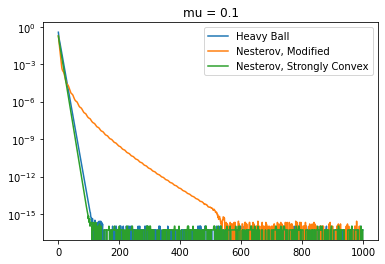

In [128]:
y2_heavyball = heavy_ball(1000, .1) - minimum(.1)
#y2_conjugate = conjugate_gradient(1000, .1) - minimum(.1)
y2_nesterov = nesterov_mod(1000, .1) - minimum(.1)
y2_nesterov_strong = nesterov_strong_convex(1000, .1) - minimum(.1)

plt.plot(y2_heavyball, label = "Heavy Ball")
#plt.plot(y2_conjugate, label = "Conjugate Gradient")
plt.plot(y2_nesterov, label = "Nesterov, Modified")
plt.plot(y2_nesterov_strong, label = "Nesterov, Strongly Convex")

plt.yscale("log")
plt.title("mu = 0.1")
plt.legend()

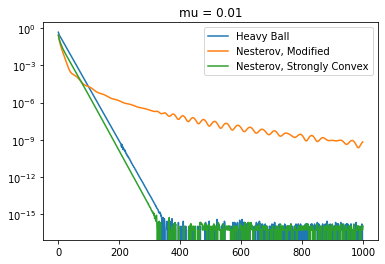

In [129]:
y3_heavyball = heavy_ball(1000, .01) - minimum(.01)
#y3_conjugate = conjugate_gradient(1000, .01) - minimum(.01)
y3_nesterov = nesterov_mod(1000, .01) - minimum(.01)
y3_nesterov_strong = nesterov_strong_convex(1000, .01) - minimum(.01)

plt.plot(y3_heavyball, label = "Heavy Ball")
#plt.plot(y3_conjugate, label = "Conjugate Gradient")
plt.plot(y3_nesterov, label = "Nesterov, Modified")
plt.plot(y3_nesterov_strong, label = "Nesterov, Strongly Convex")

plt.yscale("log")
plt.title("mu = 0.01")
plt.legend()

In [130]:
def f(x):
    if(x<1):
        return (25/2)*(x**2)
    elif(x>=2):
        return (25/2)*(x**2) - 24*x + 36
    else:
        return (x**2)/2 + 24*x - 12

In [131]:
def derivative(x):
    if(x<1):
        return 25*x
    elif(x>=2):
        return 25*x-24
    else:
        return x+24

In [140]:
def heavy_ball_2(max_iter, x_init = 3.3, mu = 1, L = 25):
    
    a_1 = 4 / (np.sqrt(mu) + np.sqrt(L))**2
    a_2 = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))
    
    x_curr = x_init
    
    values = [f(x_init)]
    
    x_curr = x_curr - a_1 * derivative(x_curr)
    values = np.append(values, f(x_curr))
    
    x_prev = x_init
    
    for i in range(2, max_iter):
        x_next = x_curr - a_1 * derivative(x_curr) + a_2 * (x_curr - x_prev)
        values = np.append(values, f(x_next))
        
        x_prev = x_curr
        x_curr = x_next

    return values

In [141]:
def nesterov_strong_convex_2(max_iter, x_init = 3.3, mu = 1, L = 25):
    
    x = x_init
    y = x_init - derivative(x_init)/L
    a = 1/(L - mu)
    A = 1/(L - mu)
    
    v = ( (1 + mu*a) * x - a * derivative(x) ) / (1 + mu*A)
    
    values = [(f(y))]
    
    for i in range(1, max_iter):
        
        A_prev = A
        v_prev = v
        
        try:
            coeff = np.asarray([mu - L, 1 + 2*mu*A, mu*(A**2) + A])
            roots = np.roots(coeff)

            if(roots[0] > 0):
                a = roots[0]
            elif(roots[1] > 0):
                a = roots[1]
            else:
                continue
        except:
            continue
            
        A = A + a
        
        x = ( A_prev / (A * (1-(mu/L))) )*y + ( 1 - (A_prev)/(A*(1 -(mu/L))) )*v_prev
        
        v = ( (1 + mu*A_prev) * v_prev + a*( mu*x - derivative(x) ) ) / (1 + mu*A)
        
        y = x - derivative(x)/L
        
        values = np.append(values, f(y))
        
    return values

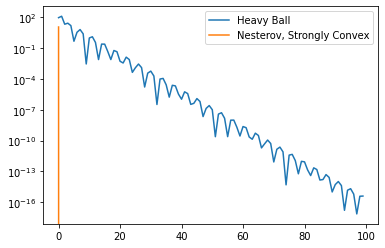

In [142]:
y4_heavy = heavy_ball_2(100)
y4_nesterov = nesterov_strong_convex_2(100)

plt.plot(y4_heavy, label = "Heavy Ball")
plt.plot(y4_nesterov, label = "Nesterov, Strongly Convex")

plt.yscale("log")
plt.legend()